In [1]:
import math

# Basic parameters

In [2]:
# --- GEOMETRY ---

ts = 300.0           # thickness of slab [mm]
cover = 25.0         # Slab cover [mm]
bar_dia = 16         # longitudinal bar dia [mm]


d1 = ts-cover-bar_dia/2
d2 = ts-cover-bar_dia-(bar_dia/2)
d  = (d1+d2)/2       # Effective depth (d) [mm]
      
c1 = 500.0           # Column dimension 1 (c1) [mm]
c2 = 400.0           # Column dimension 2 (c2) [mm]

# --- LOADS & MATERIALS ---
V_Ed = 1000*1000    # Design Punching Force at column perimeter (V_Ed) [N]

fck = 30.0           # Concrete strength (fck) [MPa]
ρ = 0.006            # Tension reinforcement ratio (rho_l) [unitless]
fy = 500.0           # Steel yield strength (fy) [MPa]

γc = 1.5             # Partial safety factor for concrete
γs = 1.15            # Partial safety factor for steel
C_RD_C = 0.18/γc     # Resistance coefficient (0.18 / GAMMA_C)

# 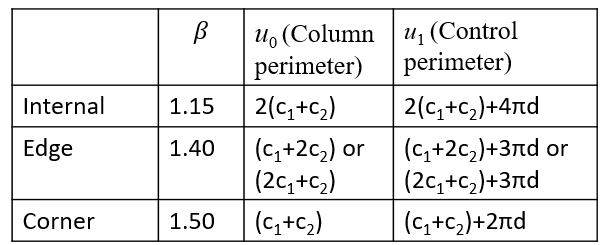

In [3]:
def get_punching_parameters(location, c1, c2, d):
    """Calculates Beta, u0, and u1 based on column location."""
    loc = location.upper()
    
    if loc == 'INTERNAL':
        β = 1.15
        u0 = 2 * (c1 + c2)
        u1 = 2 * (c1 + c2) + 4 * math.pi * d 
        
    elif loc == 'EDGE':
        β = 1.40
        u0 = (c1 + 2 * c2)
        u1 = (c1 + 2 * c2) + 3 * math.pi * d 
        
    elif loc == 'CORNER':
        β = 1.50
        u0 = c1 + c2
        u1 = (c1 + c2) + 2 * math.pi * d
        
    else:
        raise ValueError("Location must be 'INTERNAL', 'EDGE', or 'CORNER'.")
        
    return β, u0, u1, loc

# punching shear resistance at column perimeter

In [4]:
# --- CHOOSE LOCATION ---
LOCATION = 'INTERNAL'  # Options: 'INTERNAL', 'EDGE', 'CORNER'

# --- CALCULATE GEOMETRY AND FACTORS BASED ON LOCATION ---
β, U0, U1, LOC_STR = get_punching_parameters(LOCATION, c1, c2, d)

v_Ed_0 = (β * V_Ed) / (U0 * d)

print(f"v_Ed,0 (shear stress at column perimeter): {v_Ed_0:.3f} MPa")

def calculate_v_rd_max(fck):
    fcd = fck / γc
    nu = 0.6 * (1 - fck / 250)
    return 0.5 * nu * fcd

v_Rd_max = calculate_v_rd_max(fck)


print(f"v_Rd,max (shear resistance at column perimeter): {v_Rd_max:.3f} MPa")

RATIO_U0 = v_Ed_0 / v_Rd_max

print(f"Utilization Ratio: {RATIO_U0:.3f} ({'PASS' if RATIO_U0 <= 1.0 else 'FAIL'})")

v_Ed,0 (shear stress at column perimeter): 2.467 MPa
v_Rd,max (shear resistance at column perimeter): 5.280 MPa
Utilization Ratio: 0.467 (PASS)


# punching shear resistance at control perimeter

In [5]:
v_Ed_1 = (β * V_Ed) / (U1 * d)

print(f"v_Ed,1 (shear stress at control perimeter) : {v_Ed_1:.3f} MPa")

def calculate_v_rd_c(d, fck, ρ):
    k = min(1 + math.sqrt(200 / d), 2.0)
    v_min = 0.035 * k**1.5 * fck**0.5
    v_rd_c_calc = C_RD_C * k * (100 * ρ * fck)**(1/3)
    return max(v_rd_c_calc, v_min)

v_Rd_c = calculate_v_rd_c(d, fck, ρ)
print(f"v_Rd,c (shear resistance at control perimeter): {v_Rd_c:.3f} MPa")

RATIO_U1 = v_Ed_1 / v_Rd_c

print(f"Utilization Ratio: {RATIO_U1:.3f} ({'FAIL' if RATIO_U1 > 1.0 else 'PASS'})")

if RATIO_U1 > 1.0:
    print(">>> CONCLUSION: Punching shear reinforcement is REQUIRED!")
else:
    print(">>> CONCLUSION: Punching shear reinforcement NOT required. Stopping here.")

v_Ed,1 (shear stress at control perimeter) : 0.878 MPa
v_Rd,c (shear resistance at control perimeter): 0.591 MPa
Utilization Ratio: 1.487 (FAIL)
>>> CONCLUSION: Punching shear reinforcement is REQUIRED!
